In [ ]:
!pip install pytesseract
!sudo apt install tesseract-ocr-all

try:
 from PIL import Image
except ImportError:
 import Image

import cv2
from imutils.object_detection import non_max_suppression
import pytesseract

pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

import matplotlib.pyplot as plt 
import numpy as np

### OCR - ENGLISH
```USING EAST```

In [ ]:
def imageToText(pathToImage):
  #Creating argument dictionary for the default arguments needed in the code. 
  args = {'image':pathToImage, 'east':'/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/east_text_detection.pb', 'min_confidence':0.5, 'width':320, 'height':320}

  #Give location of the image to be read.
  #'Example-images/ex24.jpg' image is being loaded here. 
  image = cv2.imread(args['image'])

  #Saving a original image and shape
  orig = image.copy()
  (origH, origW) = image.shape[:2]

  # set the new height and width to default 320 by using args #dictionary.  
  (newW, newH) = (args['width'], args['height'])

  #Calculate the ratio between original and new image for both height and weight. 
  #This ratio will be used to translate bounding box location on the original image. 
  rW = origW / float(newW)
  rH = origH / float(newH)

  # resize the original image to new dimensions
  image = cv2.resize(image, (newW, newH))
  (H, W) = image.shape[:2]

  # construct a blob from the image to forward pass it to EAST model
  blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    (123.68, 116.78, 103.94), swapRB=True, crop=False)

  # load the pre-trained EAST model for text detection 
  net = cv2.dnn.readNet(args['east'])

  # We would like to get two outputs from the EAST model. 
  #1. Probabilty scores for the region whether that contains text or not. 
  #2. Geometry of the text -- Coordinates of the bounding box detecting a text
  # The following two layer need to pulled from EAST model for achieving this. 
  layerNames = [
    'feature_fusion/Conv_7/Sigmoid',
    'feature_fusion/concat_3']

  #Forward pass the blob from the image to get the desired output layers
  net.setInput(blob)
  (scores, geometry) = net.forward(layerNames)

  ## Returns a bounding box and probability score if it is more than minimum confidence
  def predictions(prob_score, geo):
    (numR, numC) = prob_score.shape[2:4]
    boxes = []
    confidence_val = []

    # loop over rows
    for y in range(0, numR):
      scoresData = prob_score[0, 0, y]
      x0 = geo[0, 0, y]
      x1 = geo[0, 1, y]
      x2 = geo[0, 2, y]
      x3 = geo[0, 3, y]
      anglesData = geo[0, 4, y]

      # loop over the number of columns
      for i in range(0, numC):
        if scoresData[i] < args["min_confidence"]:
          continue

        (offX, offY) = (i * 4.0, y * 4.0)

        # extracting the rotation angle for the prediction and computing the sine and cosine
        angle = anglesData[i]
        cos = np.cos(angle)
        sin = np.sin(angle)

        # using the geo volume to get the dimensions of the bounding box
        h = x0[i] + x2[i]
        w = x1[i] + x3[i]

        # compute start and end for the text pred bbox
        endX = int(offX + (cos * x1[i]) + (sin * x2[i]))
        endY = int(offY - (sin * x1[i]) + (cos * x2[i]))
        startX = int(endX - w)
        startY = int(endY - h)

        boxes.append((startX, startY, endX, endY))
        confidence_val.append(scoresData[i])

    # return bounding boxes and associated confidence_val
    return (boxes, confidence_val)

  # Find predictions and  apply non-maxima suppression
  (boxes, confidence_val) = predictions(scores, geometry)
  boxes = non_max_suppression(np.array(boxes), probs=confidence_val)

  from pytesseract import Output

  ##Text Detection and Recognition 

  # initialize the list of results
  results = []

  # loop over the bounding boxes to find the coordinate of bounding boxes
  for (startX, startY, endX, endY) in boxes:
    # scale the coordinates based on the respective ratios in order to reflect bounding box on the original image
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    
    #extract the region of interest
    r = orig[startY:endY, startX:endX]
    
    #configuration setting to convert image to string.
    configuration = ("--oem 1 --psm 8")
    
    ##This will recognize the text from the image of bounding box
    text = pytesseract.image_to_string(r, lang='eng', config=configuration)
    
    # append bbox coordinate and associated text to the list of results
    results.append(((startX, startY, endX, endY), text))

  #Display the image with bounding box and recognized text
  orig_image = orig.copy()

  # Moving over the results and display on the image
  for ((start_X, start_Y, end_X, end_Y), text) in results:
    # display the text detected by Tesseract
    print("{}\n".format(text))

    # Displaying text
    text = "".join([x if ord(x) < 128 else "" for x in text]).strip()
    cv2.rectangle(orig_image, (start_X, start_Y), (end_X, end_Y),
      (0, 0, 255), 2)
    cv2.putText(orig_image, text, (start_X, start_Y - 30),
      cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0, 255), 2)

  plt.imshow(orig_image)
  plt.title('Output')
  plt.show()

### PREDICTIONS

ERICSSON


MOTOROLA


NOKIA




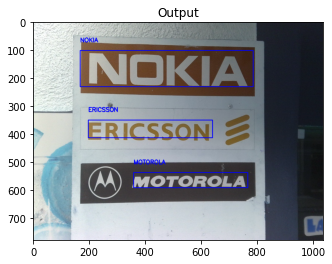

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-1.jpg')

ravindra


melody




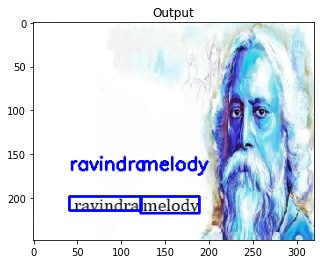

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-2.jpg')

STOP




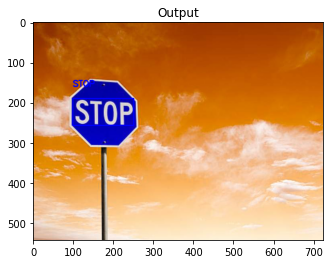

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-3.jpg')

handset




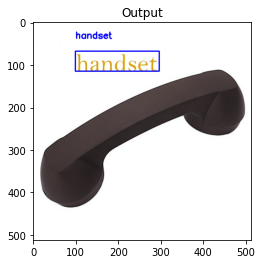

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-4.jpg')

christian ~




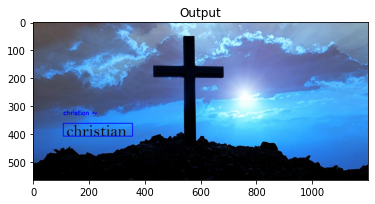

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-5.jpg')

NerIOd


Worship




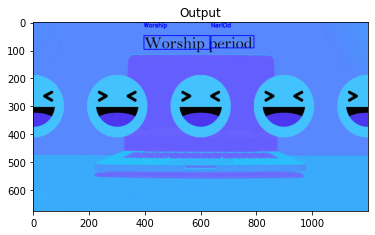

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-6.jpg')

a VEN eee


NOW




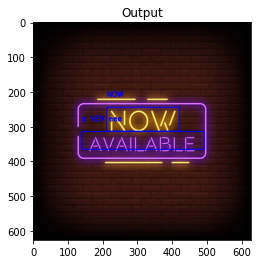

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-7.jpg')

‘Lesseract


OCR


Nosy


fest


To


Image




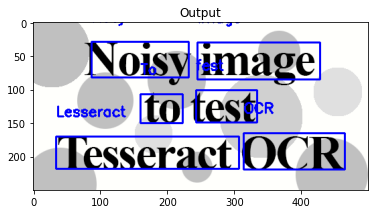

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-8.jpg')

LOCR,






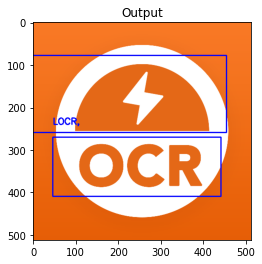

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-9.jpg')

hi




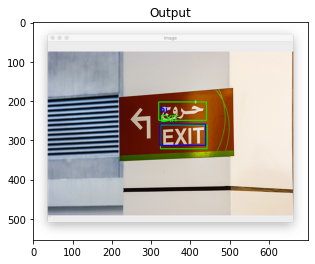

In [ ]:
imageToText('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/english/img-10.jpg')

### OCR - TAMIL
```USING TESSERACT```

In [ ]:
!pip install langdetect

In [ ]:
def imageToTextTamil(path):
  image_path_in_colab=path
  extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab),lang='tam')
  print(extractedInformation)

  from langdetect import detect_langs
  print(detect_langs(extractedInformation))

### PREDICTIONS

In [ ]:
imageToTextTamil("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1009.jpg")

   

அந்து குநூர்‌ எல்லாம்‌ ப ன்வவ்கைள்வாளை்‌

[ta:0.9999999997662914]


In [ ]:
imageToTextTamil("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_978.jpg")

இதுகான்‌ சுவறான ஸனிசயம்‌-.-

ட ஆ. 1௦810%0₹08.௦௭

[ta:0.999999999975504]


In [ ]:
imageToTextTamil("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_979.jpg")

ஹா வராடசெம காமெடி

வ:

 

[ta:0.9999999992011445]


In [ ]:
imageToTextTamil("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1001.jpg")

ஊன னள லன...

[ta:0.9999999809881752]


In [ ]:
imageToTextTamil("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/troll_1049.png")

 

த கை: ல்‌ 1
எல்லா பெண்களையும்‌ வி௫லடித்து

ம ப ய ரம?
ட்ப 2 சட்டம பனதடப

[ta:0.9999999885219631]


### OCR - TAMIL
```USING EASYOCR```

In [ ]:
!pip install easyocr --no-deps
!pip install python-bidi

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import easyocr
reader = easyocr.Reader(['ta','en'])

In [ ]:
def printImage(path):
  img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

In [ ]:
def imageToTextTamil_1(path):
  printImage(path)
  bounds = reader.readtext(path)
  for i in range(len(bounds)):
    print(bounds[i][1])

### PREDICTIONS

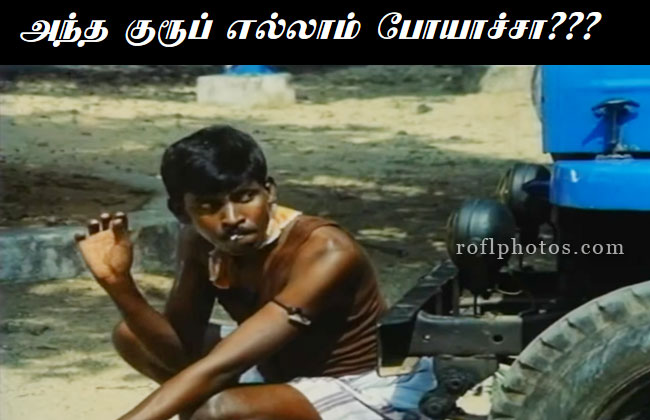

அந்த குரூப் எல்லாம் போயாச்சா???
roflphotos.
coIII


In [ ]:
imageToTextTamil_1('/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1009.jpg')

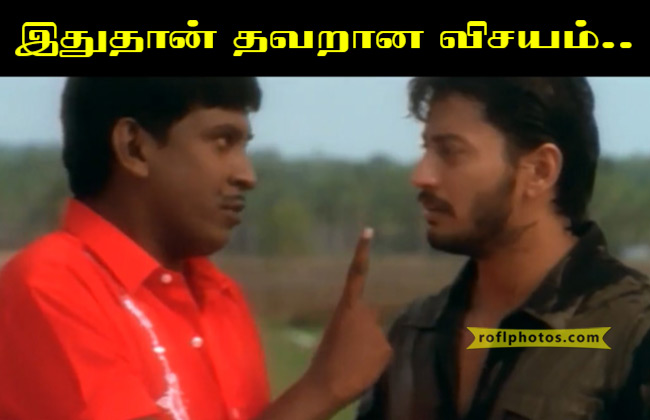

இதுதான் தவறான விசயம்
rorlphotoscom


In [ ]:
imageToTextTamil_1("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_978.jpg")

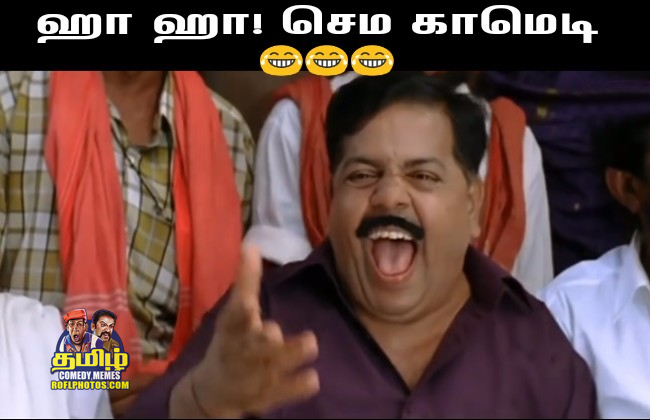

ஹா
ஹா! செம காமெடி
தமிழ்
LDILDOIUS EIM


In [ ]:
imageToTextTamil_1("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_979.jpg")

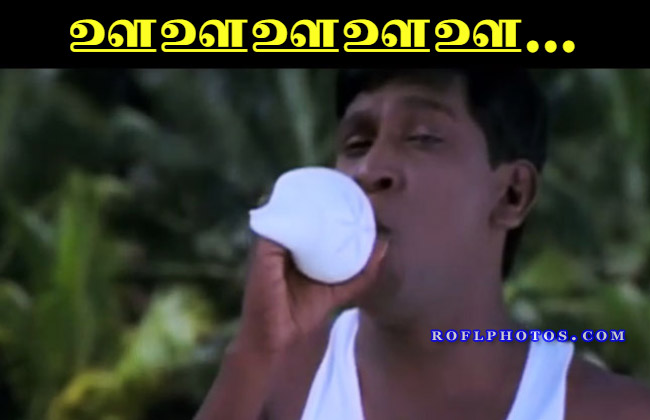

ஊஊஊஊஊ
RO FLPHOTOS . C0 M


In [ ]:
imageToTextTamil_1("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1001.jpg")

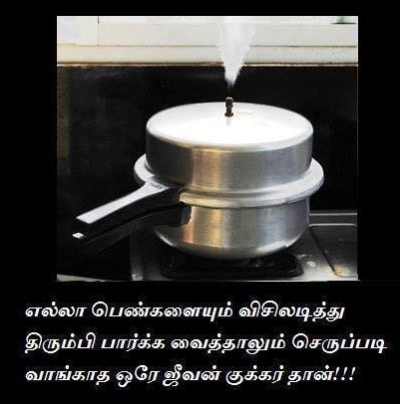

எல்லா பெண்களையும் விசிலடித்து
திரும்பி பார்க்க வைத்தாலும் செருப்படி
வாங்காத ஒரே ஜீவன் குக்கர் தான்!!!


In [ ]:
imageToTextTamil_1("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/troll_1049.png")

### OCR - TAMIL
```USING NANONETS```

In [ ]:
import requests
import re

In [ ]:
def imageToTextTamil_2(path):

  url = 'https://app.nanonets.com/api/v2/OCR/Model/bd8b54a7-974d-425e-8b72-267207b68079/LabelFile/'
  data = {'file': open(path, 'rb')}
  response = requests.post(url, auth=requests.auth.HTTPBasicAuth('audNfPMm6-8Zooc656VXRjQovzji9gHr', ''), files=data)

  find_str='"ocr_text":"'
  res = [i.start() for i in re.finditer(find_str, response.text)]

  for index in res:
    add=len(find_str)
    char=response.text[index+add]
    while(char!='"'):
      if(char=='\\'):
        add+=1
        char=response.text[index+add]
        if(char=='n'):
          add+=1
          char=response.text[index+add]
          print()
        else:
          add-=1
          char=response.text[index+add]
      print(char,end='')
      add+=1
      char=response.text[index+add]
    print()

### PREDICTIONS

In [ ]:
imageToTextTamil_2("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1009.jpg")

அந்த குரூப் எல்லாம்
போயாச்சா


In [ ]:
imageToTextTamil_2("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_978.jpg")

இதுதான்
தவறான
விசெயம்..


In [ ]:
imageToTextTamil_2("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_979.jpg")

ஹா
ஹா!
செம
காமெடி
தமிழ்
COMEDY
ROFLPHOTOS.COM


In [ ]:
imageToTextTamil_2("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/Not_troll_1001.jpg")

ஊஊஊஊஊ


In [ ]:
imageToTextTamil_2("/content/drive/MyDrive/VIT SEM/WINTER20-21/E1_CSE1015_MACHINELEARNINGESSENTIALS/PROJECT/OCR/images/tamil-memes/troll_1049.png")

எல்லா பெண்களையும் விசிலடித்து
திரும்பி பார்க்க வைத்தாலும் செருப்படி
வாங்காத ஒரே ஜீவன் குக்கர் தான்
